# Tutorial: Exploratory Data Analysis + Web Scraping

Nama : Daniel Christian Mandolang

NPM  : 2106630006

## Install Packages

In [82]:
# import libraries for data scraping and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from urllib.request import urlopen
from bs4 import BeautifulSoup

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

## 2018MLK

### Web Scrapping

In [83]:
# webpage of running results
url = "http://www.hubertiming.com/results/2018MLK"
html = urlopen(url) # open the url

# soup stores webpage content
soup = BeautifulSoup(html, 'html.parser')

# get webpage title
title = soup.title
print(title.text)

Race results for the 2018 MLK Dream Run!


In [84]:
# get webpage content
content = soup.contents
print(content)

['\n', 'html', '\n', <html>
<head>
<meta content="Race results for the 2018 MLK Dream Run!" property="og:title"/>
<meta content="Results of the 2018 MLK Dream Run at Soul District in Portland, OR" property="og:description"/>
<meta content="https://www.hubertiming.com/results/2018MLKDreamRun.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2018MLK" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Race results for the 2018 MLK Dream Run!</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css">
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.gallery.min.css" rel="stylesheet" type

In [85]:
# get url links in the webpage
all_links = soup.find_all("a")
for link in all_links:
    print(link)


<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>
<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>
<a href="https://www.hubertiming.com">Huber Timing Home</a>
<a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>
<a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>
<a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>
<a id="individual" name="individual"></a>
<a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>
<a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>

In [86]:
# get clean url links in the webpage
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [87]:
# get tables in the webpage
all_tables = soup.find_all("table")
for table in all_tables:
    print(table)
    print("####################") # pemisah antar tabel


<table class="pull-right text-xs-right" style="float:right">
<tbody>
<tr colspan="2">
<b>5K:</b>
</tr>
<tr>
<td>Finishers:</td>
<td>191</td>
</tr>
<tr>
<td>Male:</td>
<td>78</td>
</tr>
<tr>
<td>Female:</td>
<td>113</td>
</tr>
</tbody>
</table>
####################
<table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>
</thead>
<tbody>
<tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:

In [88]:
# get tables in the webpage, now print only the text
all_tables = soup.find_all("table")
for table in all_tables:
    print(table.text)
    print("####################") # pemisah antar tabel





5K:


Finishers:
191


Male:
78


Female:
113



####################



Place
Bib
Name
Gender
Age
City
State
Chip Pace
Time
Gender Place
Age Group
Age Group Place
Time to Start
Gun Time




1
1191


                    MAX RANDOLPH

                
M
29
WASHINGTON
DC
5:25
16:48


                    1 of 78

                
M 21-39


                    1 of 33

                
0:08
16:56


2
1080


                    NEED NAME KAISER RUNNER

                
M
25
PORTLAND
OR
5:39
17:31


                    2 of 78

                
M 21-39


                    2 of 33

                
0:09
17:40


3
1275


                    DAN FRANEK

                
M
52
PORTLAND
OR
5:53
18:15


                    3 of 78

                
M 40-54


                    1 of 27

                
0:07
18:22


4
1223


                    PAUL TAYLOR

                
M
54
PORTLAND
OR
5:58
18:31


                    4 of 78

                
M 40-54


                    2 of 27

      

In [89]:
# get the second table, and show the rows
result_table = all_tables[1]
print(result_table.find_all("tr"))


[<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>

                    2 of 78

                </td>
<td>M 21-39</td>
<td>

                    2 of 33

                </td>
<td>0:09</td>
<td>17:40</td>
</tr>, <tr d

In [90]:
# get the second table, and show the header
result_table = all_tables[1]
print(result_table.find_all("tr")[0])


<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>


In [91]:
# get the second table, and show the data rows
result_table = all_tables[1]
print(result_table.find_all("tr")[1:])


[<tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>

                    2 of 78

                </td>
<td>M 21-39</td>
<td>

                    2 of 33

                </td>
<td>0:09</td>
<td>17:40</td>
</tr>, <tr data-bib="1275">
<td>3</td>
<td>1275</td>
<td>

                    DAN FRANEK

                </td>
<td>M</td>
<td>52</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:53</td>
<td>18:15</td>
<td>

                    3 of 78

                </td>
<td>M 40-54</td>
<td>

    

In [92]:
# transform data rows as a list of data tuples
result_table = all_tables[1]
result_rows = result_table.find_all('tr')[1:]

list_rows = []
for row in result_rows:
    row_td = row.find_all('td')
    row_td_as_list = []
    for cell in row_td:
        row_td_as_list.append(cell.text)
    list_rows.append(tuple(row_td_as_list))
print(list_rows)


[('1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'), ('2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '\r\n\r\n                    2 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    2 of 33\r\n\r\n                ', '0:09', '17:40'), ('3', '1275', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', 'M', '52', 'PORTLAND', 'OR', '5:53', '18:15', '\r\n\r\n                    3 of 78\r\n\r\n                ', 'M 40-54', '\r\n\r\n                    1 of 27\r\n\r\n                ', '0:07', '18:22'), ('4', '1223', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n                ', 'M', '54', 'PORTLAND', 'OR', '5:58', '18:31', '\r\n\r\n   

In [93]:
# transform the table header into a list,
# here we use list comprehension
headers = [th_data.text for th_data in result_table.find_all('th')]
print(headers)


['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


### Data Analysis

In [94]:
# transform the list into Pandas data frame
df = pd.DataFrame.from_records(list_rows, columns = headers)
df.head(10) # show first 10 data


,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
1,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
2,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
3,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
4,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,6:17,19:31,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40
5,6,1185,\r\n\r\n MELISSA GIRGIS\r\n...,F,27,PORTLAND,OR,6:20,19:39,\r\n\r\n 1 of 113\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 53\r\n\r\n ...,0:07,19:46
6,7,1251,\r\n\r\n CHARLIE COGGESHALL...,M,39,PORTLAND,OR,6:24,19:51,\r\n\r\n 6 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 4 of 33\r\n\r\n ...,0:10,20:01
7,8,1154,\r\n\r\n UNKNOWN RUNNER SEE...,M,,,,8:03,24:58,\r\n\r\n 7 of 78\r\n\r\n ...,,\r\n\r\n 1 of 9\r\n\r\n ...,2:00,26:58
8,9,1163,\r\n\r\n UNKNOWN RUNNER SEE...,M,,,,8:04,25:01,\r\n\r\n 8 of 78\r\n\r\n ...,,\r\n\r\n 2 of 9\r\n\r\n ...,1:59,27:00
9,10,1242,\r\n\r\n KIMONTI WILSON\r\n...,F,48,,,8:04,25:01,\r\n\r\n 2 of 113\r\n\r\n ...,F 40-54,\r\n\r\n 1 of 37\r\n\r\n ...,1:59,27:00


In [95]:
# add additional column for 'Time' in minutes
time_list = df['Time'].tolist()

# convert 'Time' to minutes
time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
    
    except ValueError:
        m, s = i.split(':')
        h = 0
    
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

df['Runner_mins'] = time_mins
df.tail(10) # see last 10 data


,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
181,182,1114,\r\n\r\n TRISHA HUTESON\r\n...,F,46,VANCOUVER,WA,20:20,1:03:04,\r\n\r\n 105 of 113\r\n\r\n...,F 40-54,\r\n\r\n 34 of 37\r\n\r\n ...,0:24,1:03:28,63.066667
182,183,1240,\r\n\r\n GEANIE ROBINSON\r\...,F,60,,,20:46,1:04:23,\r\n\r\n 106 of 113\r\n\r\n...,F 55+,\r\n\r\n 12 of 14\r\n\r\n ...,0:32,1:04:55,64.383333
183,184,1098,\r\n\r\n MICHELLE HOFFMAN\r...,F,46,EVERETT,WA,20:59,1:05:03,\r\n\r\n 107 of 113\r\n\r\n...,F 40-54,\r\n\r\n 35 of 37\r\n\r\n ...,0:30,1:05:33,65.050000
184,185,1119,\r\n\r\n SANDY PAGE\r\n\r\n...,F,66,PORTLAND,OR,20:59,1:05:04,\r\n\r\n 108 of 113\r\n\r\n...,F 55+,\r\n\r\n 13 of 14\r\n\r\n ...,0:30,1:05:34,65.066667
185,186,1116,\r\n\r\n CHRISTINA TURNER\r...,F,39,PORTLAND,OR,21:01,1:05:09,\r\n\r\n 109 of 113\r\n\r\n...,F 21-39,\r\n\r\n 52 of 53\r\n\r\n ...,0:28,1:05:37,65.150000
186,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,21:53,1:07:51,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10,67.850000
187,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,22:00,1:08:12,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10,68.200000
188,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,22:19,1:09:11,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19,69.183333
189,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,30:17,1:33:53,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53,93.883333
190,191,1216,\r\n\r\n ZULMA OCHOA\r\n\r\...,F,40,GRESHAM,OR,33:22,1:43:27,\r\n\r\n 113 of 113\r\n\r\n...,F 40-54,\r\n\r\n 37 of 37\r\n\r\n ...,0:00,1:43:27,103.450000


In [96]:
df['Name'] = df['Name'].str.strip()
df['Gender Place'] = df['Gender Place'].str.strip()
df['Age Group Place'] = df['Age Group Place'].str.strip()
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,M 21-39,1 of 33,0:08,16:56,16.800000
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,5:39,17:31,2 of 78,M 21-39,2 of 33,0:09,17:40,17.516667
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,M 40-54,1 of 27,0:07,18:22,18.250000
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,M 40-54,2 of 27,0:07,18:38,18.516667
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,M 21-39,3 of 33,0:09,19:40,19.516667


In [97]:
def normalize_place(s: str) -> float:
    place = s.split(' of ')
    return int(place[0]) / int(place[1])

df['Gender Place'] = df['Gender Place'].apply(normalize_place)
df['Age Group Place'] = df['Age Group Place'].apply(normalize_place)
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,0.012821,M 21-39,0.030303,0:08,16:56,16.800000
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,5:39,17:31,0.025641,M 21-39,0.060606,0:09,17:40,17.516667
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,0.038462,M 40-54,0.037037,0:07,18:22,18.250000
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,0.051282,M 40-54,0.074074,0:07,18:38,18.516667
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,0.064103,M 21-39,0.090909,0:09,19:40,19.516667


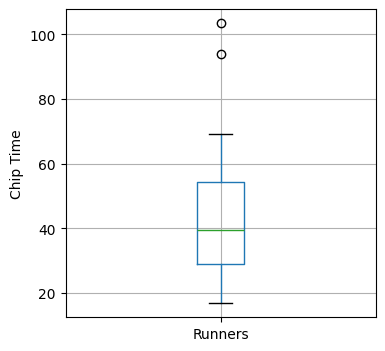

In [98]:
# show boxplot
plt.figure(figsize=(4, 4))

df.describe(include=[np.number])
df.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

x = df['Runner_mins']
plt.show()


In [99]:
df.describe()

,Gender Place,Age Group Place,Runner_mins
count,191.000000,191.000000,191.000000
mean,0.505236,0.523560,42.478185
std,0.289419,0.289690,14.903030
min,0.008850,0.018868,16.800000
25%,0.256524,0.277873,29.041667
50%,0.504425,0.518519,39.500000
75%,0.754311,0.777778,54.216667
max,1.000000,1.000000,103.450000


In [100]:
# grouped by gender: find fastest runner per gender
gender_stats = df.groupby("Gender", as_index=True)
print(gender_stats.head(1))


  Place   Bib            Name Gender Age        City State Chip Pace   Time  \
0     1  1191    MAX RANDOLPH      M  29  WASHINGTON    DC      5:25  16:48   
5     6  1185  MELISSA GIRGIS      F  27    PORTLAND    OR      6:20  19:39   

   Gender Place Age Group  Age Group Place Time to Start Gun Time  Runner_mins  
0      0.012821   M 21-39         0.030303          0:08    16:56        16.80  
5      0.008850   F 21-39         0.018868          0:07    19:46        19.65  


In [101]:
# grouped by gender: statistics summary per gender
gender_stats = df.groupby("Gender", as_index=True)
print(gender_stats.describe())


       Gender Place                                                   \
              count      mean      std       min       25%       50%   
Gender                                                                 
F             113.0  0.504425  0.28995  0.008850  0.256637  0.504425   
M              78.0  0.506410  0.29052  0.012821  0.259615  0.506410   

                      Age Group Place            ...                 \
             75%  max           count      mean  ...       75%  max   
Gender                                           ...                  
F       0.752212  1.0           113.0  0.527040  ...  0.783784  1.0   
M       0.753205  1.0            78.0  0.518519  ...  0.772727  1.0   

       Runner_mins                                                           \
             count       mean        std    min        25%   50%        75%   
Gender                                                                        
F            113.0  46.500147  14.505859  19.6

Text(0, 0.5, 'Chip Time')

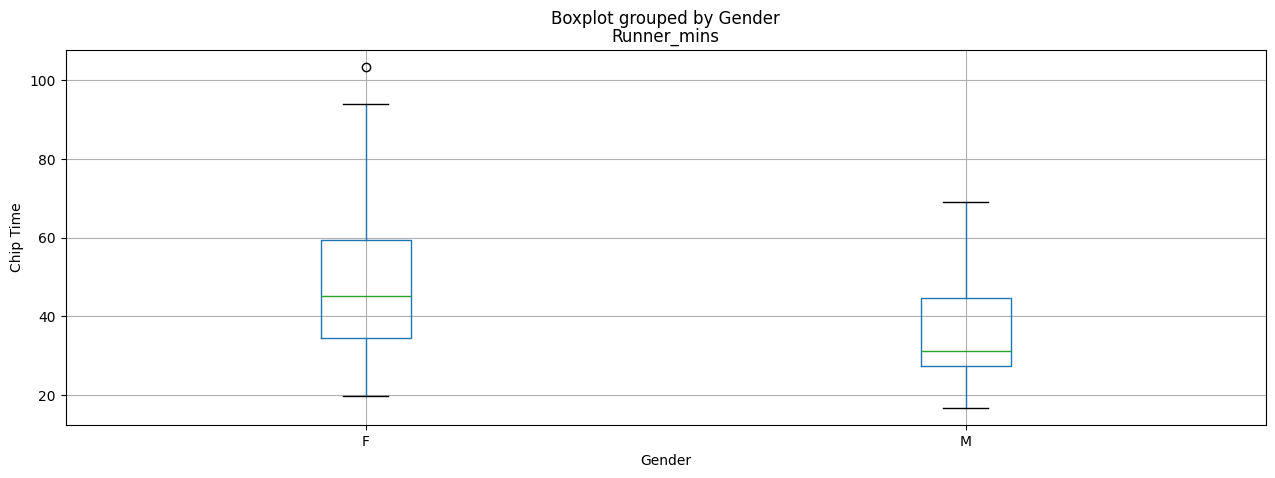

In [102]:
df.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')

<Axes: xlabel='Name'>

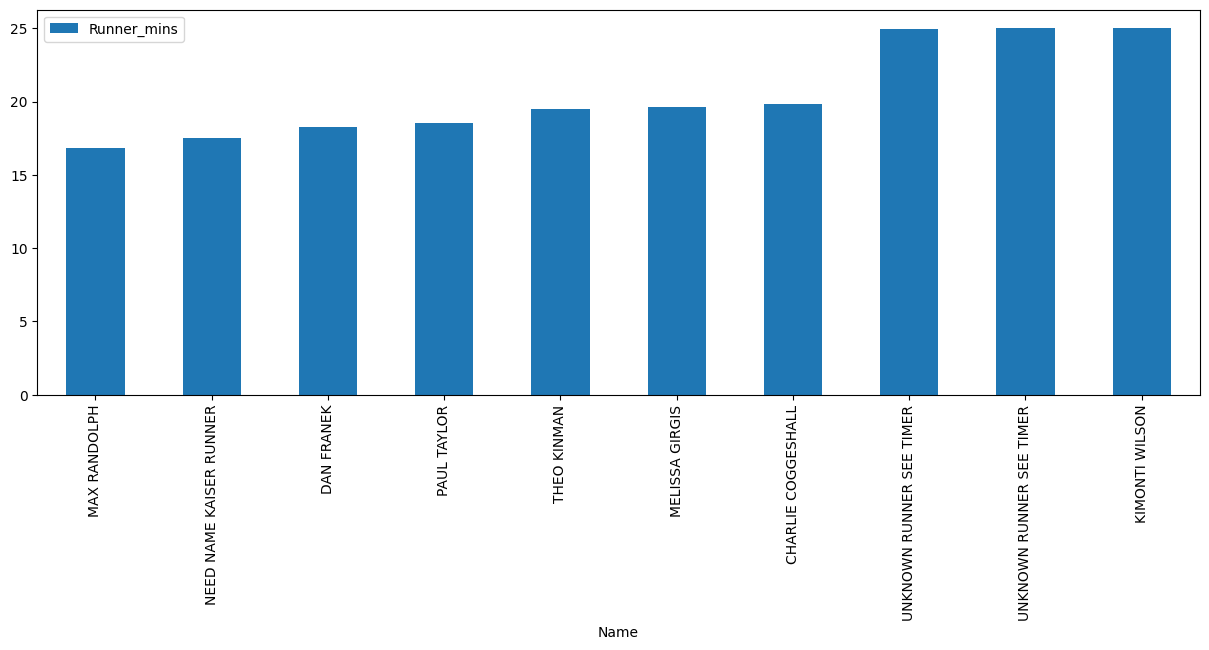

In [103]:
# bar chart for 10 fastest runners
df.head(10).plot(kind='bar',x='Name',y='Runner_mins')


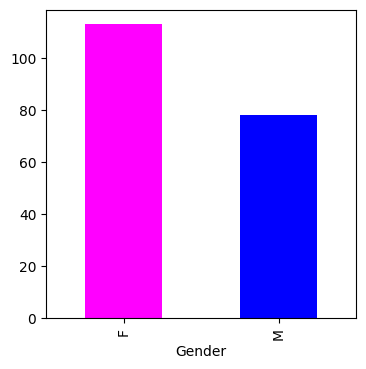

In [104]:
# count runners per gender
plt.figure(figsize=(4, 4))
df.groupby('Gender')['Bib'].nunique().plot(kind='bar', color=['magenta','b'])
plt.show()


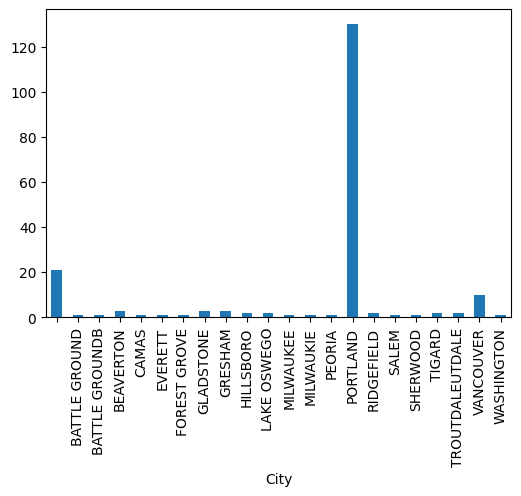

In [105]:
# count runners per city
plt.figure(figsize=(6, 4))
df.groupby('City')['Bib'].nunique().plot(kind='bar')
plt.show()


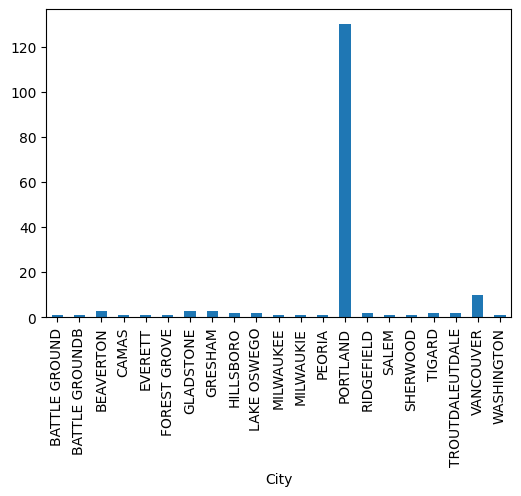

In [106]:
# count runners per city, ignoring data where the city value is null
plt.figure(figsize=(6, 4))
df.replace('', np.nan, inplace=False).groupby('City')['Bib'].nunique().plot(kind='bar')
plt.show()


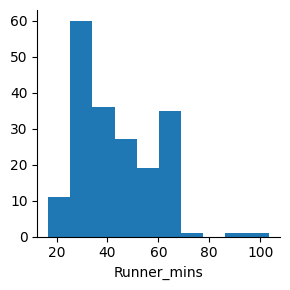

In [107]:
# seaborn, show runner mins distribution
g = sns.FacetGrid(df)
g.map(plt.hist, "Runner_mins")


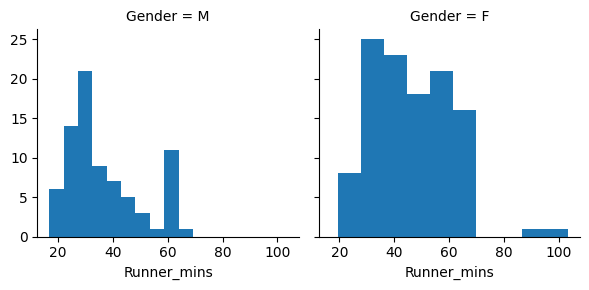

In [108]:
# seaborn, show runner mins distribution by gender
g = sns.FacetGrid(df, col='Gender')
g.map(plt.hist, "Runner_mins")


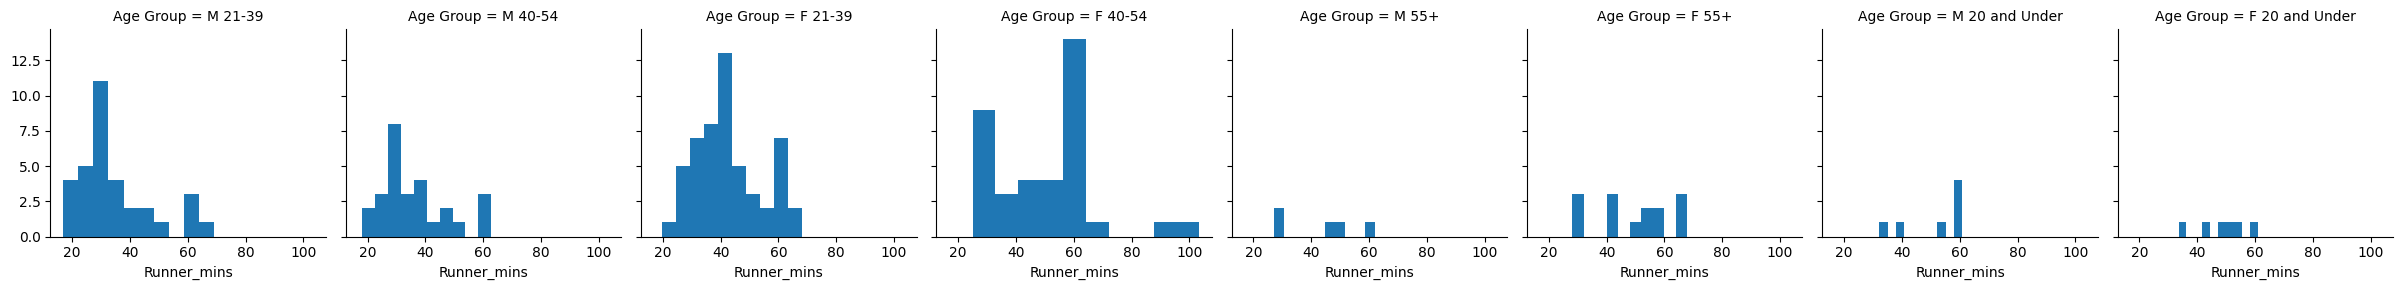

In [109]:
# seaborn, show runner mins distribution by age group
g = sns.FacetGrid(df.replace('', np.nan, inplace=False), col='Age Group')
g.map(plt.hist, "Runner_mins").savefig('runner-mins-by-age-group.jpg')


Text(0, 0.5, 'Runner Mins')

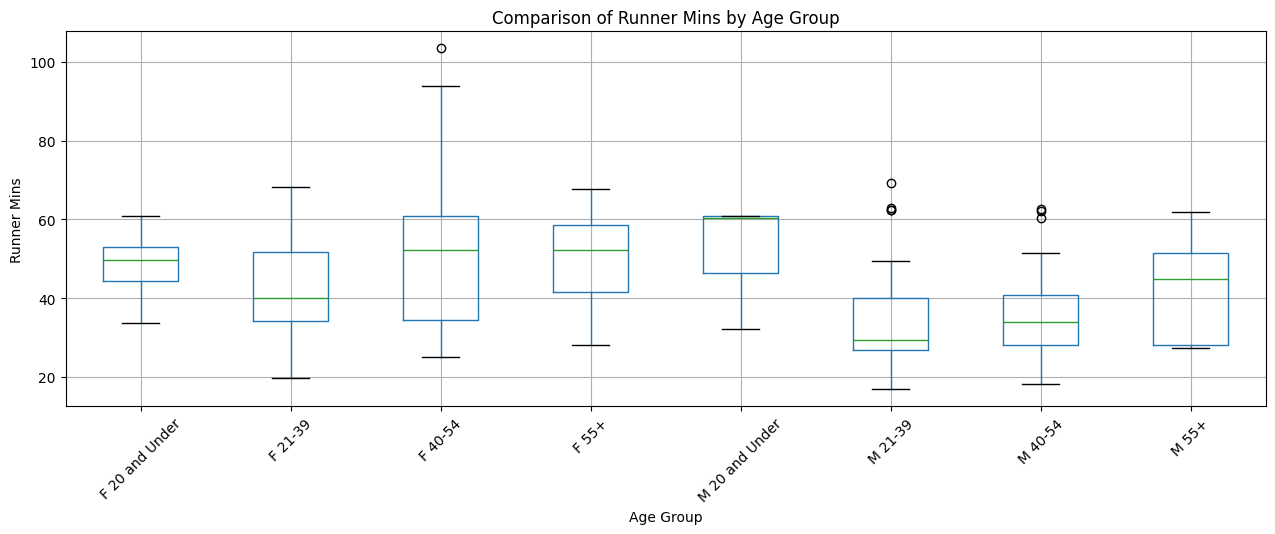

In [110]:
df.replace('', np.nan, inplace=False).boxplot(column='Runner_mins', by='Age Group', rot=45)
plt.title("Comparison of Runner Mins by Age Group")
plt.suptitle("")
plt.ylabel('Runner Mins')


## 2018MLK10K

### Web Scrapping

In [122]:
# webpage of running results
url = "http://www.hubertiming.com/results/2018MLK10K"
html = urlopen(url) # open the url

# soup stores webpage content
soup = BeautifulSoup(html, 'html.parser')

# get webpage title
title = soup.title

In [123]:
# get webpage content
content = soup.contents

In [124]:
# get tables in the webpage
all_tables = soup.find_all("table")


In [125]:
# transform data rows as a list of data tuples
result_table = all_tables[1]
result_rows = result_table.find_all('tr')[1:]

list_rows = []
for row in result_rows:
    row_td = row.find_all('td')
    row_td_as_list = []
    for cell in row_td:
        row_td_as_list.append(cell.text)
    list_rows.append(tuple(row_td_as_list))


In [126]:
# transform the table header into a list,
# here we use list comprehension
headers = [th_data.text for th_data in result_table.find_all('th')]


### Data Analysis

In [127]:
# transform the list into Pandas data frame
df = pd.DataFrame.from_records(list_rows, columns = headers)


In [128]:
# add additional column for 'Time' in minutes
time_list = df['Time'].tolist()

# convert 'Time' to minutes
time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
    
    except ValueError:
        m, s = i.split(':')
        h = 0
    
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

df['Runner_mins'] = time_mins


In [129]:
df['Name'] = df['Name'].str.strip()
df['Gender Place'] = df['Gender Place'].str.strip()
df['Age Group Place'] = df['Age Group Place'].str.strip()
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,2051,CHRISTOPHER SHEAFFER,M,34,PORTLAND,OR,5:27,33:50,1 of 29,M 21-39,1 of 11,0:10,34:00,33.833333
1,2,2067,TYLER DUDLEY,M,28,BEAVERTON,OR,5:40,35:12,2 of 29,M 21-39,2 of 11,0:09,35:21,35.200000
2,3,2078,DAVID HEWLETT,M,31,PORTLAND,OR,6:24,39:43,3 of 29,M 21-39,3 of 11,0:20,40:03,39.716667
3,4,2034,RYAN LAPIER,M,29,BEAVERTON,OR,6:27,40:00,4 of 29,M 21-39,4 of 11,0:09,40:09,40.000000
4,5,2092,UNKNOWN RUNNER SEE TIMER,M,,,,6:35,40:49,5 of 29,,1 of 5,0:11,41:00,40.816667


In [130]:
def normalize_place(s: str) -> float:
    place = s.split(' of ')
    return int(place[0]) / int(place[1])

df['Gender Place'] = df['Gender Place'].apply(normalize_place)
df['Age Group Place'] = df['Age Group Place'].apply(normalize_place)
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,2051,CHRISTOPHER SHEAFFER,M,34,PORTLAND,OR,5:27,33:50,0.034483,M 21-39,0.090909,0:10,34:00,33.833333
1,2,2067,TYLER DUDLEY,M,28,BEAVERTON,OR,5:40,35:12,0.068966,M 21-39,0.181818,0:09,35:21,35.200000
2,3,2078,DAVID HEWLETT,M,31,PORTLAND,OR,6:24,39:43,0.103448,M 21-39,0.272727,0:20,40:03,39.716667
3,4,2034,RYAN LAPIER,M,29,BEAVERTON,OR,6:27,40:00,0.137931,M 21-39,0.363636,0:09,40:09,40.000000
4,5,2092,UNKNOWN RUNNER SEE TIMER,M,,,,6:35,40:49,0.172414,,0.200000,0:11,41:00,40.816667


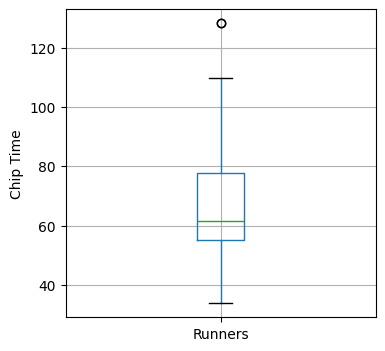

In [131]:
# show boxplot
plt.figure(figsize=(4, 4))

df.describe(include=[np.number])
df.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

x = df['Runner_mins']
plt.show()


## 2018MLK15K

### Web Scrapping 

In [132]:
# webpage of running results
url = "http://www.hubertiming.com/results/2018MLK15K"
html = urlopen(url) # open the url

# soup stores webpage content
soup = BeautifulSoup(html, 'html.parser')

# get webpage title
title = soup.title

In [133]:
# get webpage content
content = soup.contents

In [134]:
# get tables in the webpage
all_tables = soup.find_all("table")


In [135]:
# transform data rows as a list of data tuples
result_table = all_tables[1]
result_rows = result_table.find_all('tr')[1:]

list_rows = []
for row in result_rows:
    row_td = row.find_all('td')
    row_td_as_list = []
    for cell in row_td:
        row_td_as_list.append(cell.text)
    list_rows.append(tuple(row_td_as_list))


In [136]:
# transform the table header into a list,
# here we use list comprehension
headers = [th_data.text for th_data in result_table.find_all('th')]


### Data Analysis

In [137]:
# transform the list into Pandas data frame
df = pd.DataFrame.from_records(list_rows, columns = headers)


In [138]:
# add additional column for 'Time' in minutes
time_list = df['Time'].tolist()

# convert 'Time' to minutes
time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
    
    except ValueError:
        m, s = i.split(':')
        h = 0
    
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

df['Runner_mins'] = time_mins


In [139]:
df['Name'] = df['Name'].str.strip()
df['Gender Place'] = df['Gender Place'].str.strip()
df['Age Group Place'] = df['Age Group Place'].str.strip()
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,3048,GEOFF BERGMAN,M,44,PORTLAND,OR,6:54,1:04:11,1 of 32,M 40-54,1 of 11,0:06,1:04:17,64.183333
1,2,3059,BRAD DIXON,M,40,PORTLAND,OR,6:54,1:04:17,2 of 32,M 40-54,2 of 11,0:03,1:04:20,64.283333
2,3,3056,KELLY SLAYTON,M,51,PORTLAND,OR,6:55,1:04:19,3 of 32,M 40-54,3 of 11,0:03,1:04:22,64.316667
3,4,3005,MATTHEW KERTESZ,M,46,PORTLAND,OR,7:15,1:07:34,4 of 32,M 40-54,4 of 11,0:05,1:07:39,67.566667
4,5,3012,CARL GREEN JR,M,35,PORTLAND,OR,7:16,1:07:40,5 of 32,M 21-39,1 of 18,0:03,1:07:43,67.666667


In [140]:
def normalize_place(s: str) -> float:
    place = s.split(' of ')
    return int(place[0]) / int(place[1])

df['Gender Place'] = df['Gender Place'].apply(normalize_place)
df['Age Group Place'] = df['Age Group Place'].apply(normalize_place)
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
0,1,3048,GEOFF BERGMAN,M,44,PORTLAND,OR,6:54,1:04:11,0.03125,M 40-54,0.090909,0:06,1:04:17,64.183333
1,2,3059,BRAD DIXON,M,40,PORTLAND,OR,6:54,1:04:17,0.06250,M 40-54,0.181818,0:03,1:04:20,64.283333
2,3,3056,KELLY SLAYTON,M,51,PORTLAND,OR,6:55,1:04:19,0.09375,M 40-54,0.272727,0:03,1:04:22,64.316667
3,4,3005,MATTHEW KERTESZ,M,46,PORTLAND,OR,7:15,1:07:34,0.12500,M 40-54,0.363636,0:05,1:07:39,67.566667
4,5,3012,CARL GREEN JR,M,35,PORTLAND,OR,7:16,1:07:40,0.15625,M 21-39,0.055556,0:03,1:07:43,67.666667


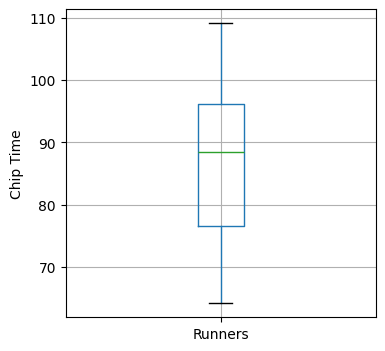

In [141]:
# show boxplot
plt.figure(figsize=(4, 4))

df.describe(include=[np.number])
df.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

x = df['Runner_mins']
plt.show()
